In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras import Input, Model, regularizers
from keras.datasets import mnist
from keras.layers import Dense
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.losses import categorical_crossentropy, mean_squared_error
from tensorflow.keras.optimizers import Adam
import sys

In [119]:
n_bodies = 2
G=1
#problem is solved in 2D
D=2
masses = np.array([10**6,1]) #(0.5+np.random.rand(n_bodies))*10**2
positions = np.random.rand(n_bodies*D)
positions = np.array([0,0,110,200])

momentums = np.array([0,0,1,2])#np.random.rand(n_bodies*D)
def compute_derivative_hamiltonian(state,t,eval_der_p = True, eval_der_q = True):
    q = state[0:n_bodies*D]
    p = state[n_bodies*D::]
    dh_dp = np.zeros(n_bodies*D)
    dh_dq = np.zeros((n_bodies,D))
    if(eval_der_p):
        for k,b in enumerate(np.arange(0,dh_dp.size,D)):
            dh_dp[b:b+2]=p[b:b+2]/masses[k]
            
    if(eval_der_q):
        r = np.reshape(q,(n_bodies,D))
        for b in range(n_bodies):
            for dif in range(n_bodies):
                if b!=dif:
                    dh_dq[b,:] += G*masses[b]*masses[dif]/(np.linalg.norm(r[b,:]-r[dif,:]))**2*(r[b,:]-r[dif,:])
        dh_dq = dh_dq.flatten()
    
    return dh_dp, dh_dq
def symplectic_integrator(initial_state, dt, n_steps):
    result = np.zeros((initial_state.size,n_steps))
    result[:,0] = initial_state
    half_dim = n_bodies*D
    for i in tqdm(range(1,n_steps)):
        dh_dp, dh_dq = compute_derivative_hamiltonian(result[:,i-1], 0, eval_der_p=False,eval_der_q=True  )
        result[half_dim:,i] = result[half_dim:,i-1] - dt*dh_dq
        dh_dp, dh_dq = compute_derivative_hamiltonian(result[:,i], 0, eval_der_p=True,eval_der_q=False  )
        result[:half_dim,i] = result[half_dim:,i-1] + dt*dh_dp
    return result

In [120]:
initial_state = np.concatenate((positions,momentums))

In [121]:
initial_state.shape

(8,)

In [122]:
dt=0.01
n_steps=10000
rres = symplectic_integrator(initial_state, dt, n_steps)

In [123]:
r1 = rres[0:2,:]

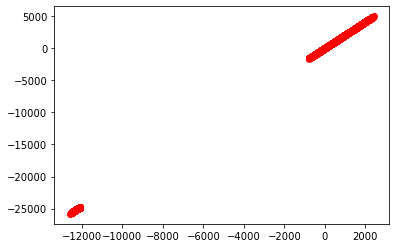

In [125]:
plt.plot(rres[0,:],rres[1,:] ,"ro")

In [40]:
for i in np.arange(0,aa.size,2):
    print(aa[i:i+2])

[0.53920027 0.71964254]
[0.68274215 0.58627353]
[0.82783422 0.1962139 ]


In [31]:
a.flatten()

array([0.53920027, 0.71964254, 0.68274215, 0.58627353, 0.82783422,
       0.1962139 ])

In [126]:
a.shape

(3, 2)